Authors

*   Giang VU: jangvuit@gmail.com
*   Lukas Beiske: lukasbeiske@gmx.de
*   Naima Islam Nodi: naimanodi@gmail.com



# Analysis of Sentence and Word Length Variation Across Spoken and Written Genres

This project aims to explore the differences in sentence and word length between spoken and written language, focusing on genres such as interviews and conversations (spoken) and academic and fiction texts (written). The goal is to analyze how these lengths vary and whether excluding stop words, which do not contribute directly to a sentence’s semantic meaning, impacts this variation. Two hypotheses guide the analysis: first, that spoken language tends to have shorter sentence and word lengths, and second, that the variation in these lengths may decrease once stop words are excluded.

A subset of the GUM corpus will be analyzed, with interview and conversation representing spoken language, and academic and fiction representing written language. The removal of stop words does result in some information loss, however, the extent of this loss depends on the composition of the stop word list. For example, in (1), the meaning of the sentence is negated after the removal of stop words, as seen in (2).

(1) This is not a green apple.

(2) green apple

Nevertheless, the removal of stop words is a widely used technique in NLP tasks, especially in information retrieval, as it helps focus on the key elements of a sentence's meaning. This also means that, in accordance with Zipf's law, the most frequent words in the corpus will be removed during this part of the analysis.

In order to accomplish the analysis the following code loads the data and removes punctuation as a first preprocessing process. After that a function is responsible for calculating the average word and sentence lengtes. After that  the data frame is filtered out of stop words and the function is applied to the new data frame.


In [ ]:
#Import necesaary libraries
import pathlib

In [ ]:
import numpy as np
import pandas as pd

# Parsing data

All the three files have been combined in the following part for enriching the dataset for our consideration.

In [ ]:
#Variable lists for storing data
count_d = 0
genres_pd = []
word = []
lemma = []
upos = []
xpos = []
morph = []
count = []
idx = []
document_check = {}
#Read the file
with open(pathlib.Path('UD_English-GUM', f'en_gum-ud-all.conllu'), encoding="utf8") as f:
        lines = f.readlines()
        for line in lines:
            line = line.strip()
            #Check for genres
            if 'meta::genre' in line:
                genre = line.split(' ')[-1]
                if genre not in document_check.keys():
                    document_check[genre] = [1]
                else:
                    last_value = document_check[genre][-1] + 1
                    document_check[genre].append(last_value)
            if not line.startswith('#'): #Splitting the lines
                line = line.split('\t')
                if len(line) > 1 and '-' not in line[0]:
                    try:
                        count.append(int(line[0]))
                    except:
                        print("")
                    #Extract information contianed in the corpus
                    genres_pd.append(genre)
                    word.append(line[1])
                    lemma.append(line[2])
                    upos.append(line[3])
                    xpos.append(line[4])
                    morph.append(line[5])
                    idx.append(document_check[genre][-1])

##DataFrame

Considering the genres, the data has been analysed. For each genre get the related information.


*   Order of words
*   Words
*   Lemma
*   upos
*   xpos





In [ ]:
df = pd.DataFrame(zip(count,word,lemma,upos,xpos,genres_pd,idx))

In [ ]:
df = df.rename(columns={0: "count", 1: "word", 2:"lemma",3:"upos",4:"xpos",5:"genre",6:"idx"})

In [ ]:
df.to_csv('gum_all.csv')

In [ ]:
#Data visualization
df

,count,word,lemma,upos,xpos,genre,idx
0,1,Introduction,introduction,NOUN,NN,academic,1
1,1,Research,research,NOUN,NN,academic,1
2,2,on,on,ADP,IN,academic,1
3,3,adult,adult,NOUN,NN,academic,1
4,4,-,-,PUNCT,HYPH,academic,1
...,...,...,...,...,...,...,...
211915,14,cans,can,NOUN,NNS,whow,19
211916,15,away,away,ADV,RB,whow,19
211917,16,from,from,ADP,IN,whow,19
211918,17,the,the,DET,DT,whow,19




```
# This is formatted as code
```



In [ ]:
mask_1 = df['upos'] == 'PUNCT'
mask_2 = df['upos'] == 'SYM'
df_wo = df[~mask_1]
df_wo = df_wo[~mask_2]

C:\Users\22313906t\AppData\Local\Temp\ipykernel_20064\2122229547.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_wo = df_wo[~mask_2]


Removing PUNCT and SYS pos tag

# Analyzing

1. word length means how many words in the whole document
2. sentence length means how many sentences in the whole document
3. how many words in one sentence
4. pos occurrences

In [ ]:
#function for counting the number of the words, number of the sentences and counting of the words per sentences
def analysing(df):
    num_sen = len(df[df['count'] == 1])
    idx_start = df[df['count'] == 1].index.to_list()
    idx_end = [x - 1 for x in idx_start] + [len(df)-1]
    len_sen = df.iloc[idx_end[1:]]['count'].to_list()
    words_per_sen = sum(len_sen)/num_sen
    num_word = len(df)
    return num_word, num_sen, words_per_sen

In [ ]:
def word_count(df):
    return df['word'].apply(lambda x: len(x))

### Written corpus

In [ ]:
df_written = pd.concat([df[df['genre'] == 'academic'], df[df['genre'] == 'fiction']], axis=0).reset_index()

In [ ]:
num_word, num_sen_written, words_per_sen = analysing(df_written)

In [ ]:
print(f'The written corpus has {num_word} words, {num_sen_written} sentences, and {words_per_sen} words per sentences')

The written corpus has 34679 words, 1702 sentences, and 20.37132784958872 words per sentences


Top 20 most popular words in the written corpus

In [ ]:
df_written.groupby(['word']).count().sort_values(['index'],ascending=False)['count'][:20]

word
,       1799
the     1658
.       1471
of       972
and      897
to       654
a        576
in       531
I        370
that     342
was      236
-        231
is       217
it       213
“        199
on       196
”        192
(        181
)        180
with     179
Name: count, dtype: int64

### Spoken corpus

In [ ]:
df_spoken = pd.concat([df[df['genre'] == 'conversation'], df[df['genre'] == 'interview']], axis=0).reset_index()

In [ ]:
num_word, num_sen_spoken, words_per_sen = analysing(df_spoken)

In [ ]:
print(f'The spoken  corpus has {num_word} words, {num_sen_spoken} sentences, and {words_per_sen} words per sentences')

The spoken  corpus has 34587 words, 2966 sentences, and 11.669588671611598 words per sentences


Top 20 most popular words in the spoken corpus

In [ ]:
df_spoken.groupby(['word']).count().sort_values(['index'],ascending=False)['count'][:20]

word
.       2240
,       2006
the     1158
I        714
and      633
to       632
a        578
of       563
you      520
it       463
that     449
?        440
in       437
's       382
is       320
was      247
do       214
n't      213
have     207
—        204
Name: count, dtype: int64

From the top 20 written and spoken data, it is clear that the frequency of the stopwords and punctuations are higher and occupies more data space. However, as the stopwords and punctuations contains very little semantic meaning and isn't really helpful for information retrieval, we decided to check how it varies considering the written and spoken words of the considered dataset.

## Punctuation Elimination

### Written

In [ ]:
df_written_wo = pd.concat([df_wo[df_wo['genre'] == 'academic'], df_wo[df_wo['genre'] == 'fiction']], axis=0).reset_index()

Here, the punctual from the wriiten data (in our case it's "academic" and "ficrtion") are removed.

In [ ]:
num_word_pun = len(df_written_wo)
words_per_sen_pun = num_word_pun/num_sen_written

In [ ]:
df_written_wo['word_len'] = word_count(df_written_wo)

In [ ]:
df_written_wo

,index,count,word,lemma,upos,xpos,genre,idx,word_len
0,0,1,Introduction,introduction,NOUN,NN,academic,1,12
1,1,1,Research,research,NOUN,NN,academic,1,8
2,2,2,on,on,ADP,IN,academic,1,2
3,3,3,adult,adult,NOUN,NN,academic,1,5
4,5,5,learned,learn,VERB,VBN,academic,1,7
...,...,...,...,...,...,...,...,...,...
29433,197658,11,teeth,tooth,NOUN,NNS,fiction,19,5
29434,197659,12,on,on,ADP,IN,fiction,19,2
29435,197660,13,Steven,Steven,PROPN,NNP,fiction,19,6
29436,197661,14,’s,'s,PART,POS,fiction,19,2


In [ ]:
word_len_pun = sum(df_written_wo['word_len'].to_list())/num_word_pun

In [ ]:
print(f'The written wo PUNCT corpus has {num_word_pun} words, {num_sen_written} sentences, {round(words_per_sen_pun,1)} words per sentences, and {round(word_len_pun,1)} characters per word')

The written wo PUNCT corpus has 29438 words, 1702 sentences, 17.3 words per sentences, and 4.7 characters per word


### Spoken

Here, the punctual from the spoken data (in our case it's "conversation" and "interview") are removed.

In [ ]:
df_spoken_wo = pd.concat([df_wo[df_wo['genre'] == 'conversation'], df_wo[df_wo['genre'] == 'interview']], axis=0).reset_index()

In [ ]:
num_word_sp_pun = len(df_spoken_wo)
words_per_sen_sp_pun = num_word_sp_pun/num_sen_spoken

In [ ]:
df_spoken_wo['word_len'] = word_count(df_spoken_wo)

In [ ]:
df_spoken_wo

,index,count,word,lemma,upos,xpos,genre,idx,word_len
0,3482,5,What,what,PRON,WP,conversation,1,4
1,3483,6,'d,do,AUX,VBD,conversation,1,2
2,3484,1,you,you,PRON,PRP,conversation,1,3
3,3485,2,do,do,VERB,VB,conversation,1,2
4,3486,1,Sabrina,Sabrina,PROPN,NNP,conversation,1,7
...,...,...,...,...,...,...,...,...,...
29035,199316,14,highlighted,highlight,VERB,VBN,interview,19,11
29036,199317,15,in,in,ADP,IN,interview,19,2
29037,199318,16,red,red,NOUN,NN,interview,19,3
29038,199320,18,Image,image,NOUN,NN,interview,19,5


In [ ]:
word_len_sp_pun = sum(df_spoken_wo['word_len'].to_list())/num_word_sp_pun

In [ ]:
print(f'The spoken wo PUNCT corpus has {num_word_sp_pun} words, {num_sen_spoken} sentences, {round(words_per_sen_sp_pun,1)} words per sentences, and {round(word_len_sp_pun,1)} characters per word')

The spoken wo PUNCT corpus has 29040 words, 2966 sentences, 9.8 words per sentences, and 4.2 characters per word


## Stop words

## Written

Stopwords from the written corpus has been removed here.

In [ ]:
#import nltk for using the default stopword remover
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
stop_words = (stopwords.words('english'))

Manual Noise cancelation.

In [ ]:
stop_words = stop_words + ["'s","'re","n't","'d","'m","'ll","n’t","’s"]

In [ ]:
def remove_by_word(x):
    x = x.lower()
    if x in stop_words:
        x = 'None'
    return x

### Spoken

Stopwords from the spoken corpus has been removed here.

In [ ]:
spoken_stw = df_spoken_wo['word'].apply(remove_by_word).to_list()
df_spoken_wo['wo_stop'] = spoken_stw

In [ ]:
df_spoken_wo

,index,count,word,lemma,upos,xpos,genre,idx,word_len,wo_stop
0,3482,5,What,what,PRON,WP,conversation,1,4,None
1,3483,6,'d,do,AUX,VBD,conversation,1,2,None
2,3484,1,you,you,PRON,PRP,conversation,1,3,None
3,3485,2,do,do,VERB,VB,conversation,1,2,None
4,3486,1,Sabrina,Sabrina,PROPN,NNP,conversation,1,7,sabrina
...,...,...,...,...,...,...,...,...,...,...
29035,199316,14,highlighted,highlight,VERB,VBN,interview,19,11,highlighted
29036,199317,15,in,in,ADP,IN,interview,19,2,None
29037,199318,16,red,red,NOUN,NN,interview,19,3,red
29038,199320,18,Image,image,NOUN,NN,interview,19,5,image


In [ ]:
df_spoken_wo[df_spoken_wo['wo_stop']!='None']['word_len']

4         7
5         7
7         4
9         5
12        7
         ..
29034     8
29035    11
29037     3
29038     5
29039     5
Name: word_len, Length: 13855, dtype: int64

#Result count after removing the stopwords

##Spoken

In [ ]:
num_word_sp_sw = len(df_spoken_wo[df_spoken_wo['wo_stop']!='None']['word'])
words_per_sen_sp_sw = num_word_sp_sw/num_sen_spoken

In [ ]:
word_len_sp_sw = sum(df_spoken_wo[df_spoken_wo['wo_stop']!='None']['word_len'].to_list())/num_word_sp_sw

5.670299530855287

In [ ]:
print(f'The spoken wo (PUNCT, stop words) corpus has {num_word_sp_sw} words, {num_sen_spoken} sentences, {round(words_per_sen_sp_sw,1)} words per sentences, and {round(word_len_sp_sw,1)} characters per word')

The spoken wo (PUNCT, stop words) corpus has 13855 words, 2966 sentences, 4.7 words per sentences, and 5.7 characters per word


top 20 popular words in the spoken document

In [ ]:
df_spoken_wo[df_spoken_wo['wo_stop'] != 'None'].groupby(['wo_stop']).count().sort_values(['index'],ascending=False)['count'][:20]

wo_stop
know      168
like      167
yeah      137
well      118
one       117
oh        116
would      98
think      92
two        81
get        73
right      68
go         62
people     62
really     60
uh         55
see        52
mean       51
na         51
okay       50
good       49
Name: count, dtype: int64

### Written

In [ ]:
written_stw = df_written_wo['word'].apply(remove_by_word).to_list()
df_written_wo['wo_stop'] = written_stw

In [ ]:
df_written_wo

,index,count,word,lemma,upos,xpos,genre,idx,word_len,wo_stop
0,0,1,Introduction,introduction,NOUN,NN,academic,1,12,introduction
1,1,1,Research,research,NOUN,NN,academic,1,8,research
2,2,2,on,on,ADP,IN,academic,1,2,None
3,3,3,adult,adult,NOUN,NN,academic,1,5,adult
4,5,5,learned,learn,VERB,VBN,academic,1,7,learned
...,...,...,...,...,...,...,...,...,...,...
29433,197658,11,teeth,tooth,NOUN,NNS,fiction,19,5,teeth
29434,197659,12,on,on,ADP,IN,fiction,19,2,None
29435,197660,13,Steven,Steven,PROPN,NNP,fiction,19,6,steven
29436,197661,14,’s,'s,PART,POS,fiction,19,2,None


In [ ]:
num_word_sw = len(df_written_wo[df_written_wo['wo_stop']!='None']['word'])
words_per_sen_sw = num_word_sw/num_sen_written

In [ ]:
word_len_sw = sum(df_written_wo[df_written_wo['wo_stop']!='None']['word_len'].to_list())/num_word_sw
word_len_sw

6.376109513689211

In [ ]:
print(f'The written wo (PUNCT, stop words) corpus has {num_word_sw} words, {num_sen_written} sentences, {round(words_per_sen_sw,1)} words per sentences, and {round(word_len_sw,1)} characters per word')

The written wo (PUNCT, stop words) corpus has 15998 words, 1702 sentences, 9.4 words per sentences, and 6.4 characters per word


top 20 popular words in the written document

In [ ]:
df_written_wo[df_written_wo['wo_stop'] != 'None'].groupby(['wo_stop']).count().sort_values(['index'],ascending=False)['count'][:20]

wo_stop
like        74
one         71
said        64
research    52
study       51
could       49
two         45
time        43
would       42
first       41
studies     40
see         38
back        37
even        37
also        34
used        32
1           32
language    31
sea         31
system      29
Name: count, dtype: int64

## Result
1. The written wo PUNCT corpus has 29438 words, 1702 sentences, 17.3 words per sentences, and 4.7 characters per word.
2. The spoken wo PUNCT corpus has 29040 words, 2966 sentences, 9.8 words per sentences, and 4.2 characters per word.
3. The written wo (PUNCT, stop words) corpus has 15998 words, 1702 sentences, 9.4 words per sentences, and 6.4 characters per word
4. The spoken wo (PUNCT, stop words) corpus has 13855 words, 2966 sentences, 4.7 words per sentences, and 5.7 characters per word

In [ ]:
words_per_sen_sp_pun

9.790964261631828

In [ ]:
written_pun = [words_per_sen_pun,word_len_pun]
spoken_pun = [words_per_sen_sp_pun,word_len_sp_pun]
written_sw = [words_per_sen_sw,word_len_sw]
spoken_sw = [words_per_sen_sp_sw,word_len_sp_sw]

In [ ]:
from matplotlib import pyplot as plt

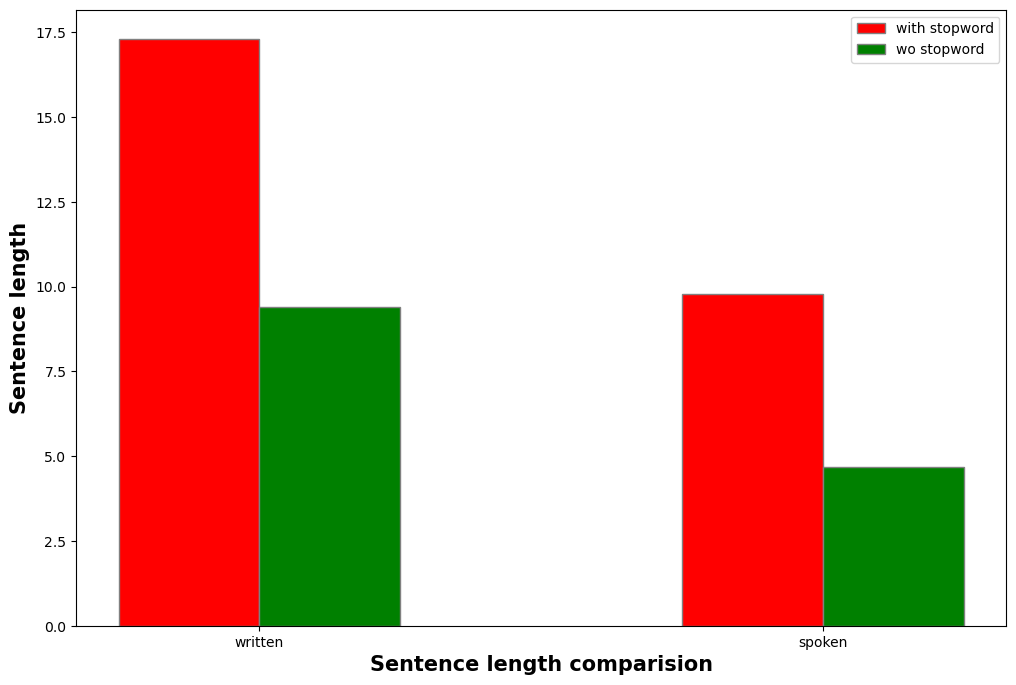

In [ ]:
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))

# set height of bar
w = [words_per_sen_pun,words_per_sen_sp_pun]

wo = [words_per_sen_sw,words_per_sen_sp_sw]

# Set position of bar on X axis
br1 = np.arange(len(written_pun))
br2 = [x + barWidth for x in br1]

# Make the plot
plt.bar(br1, w, color ='r', width = barWidth,
        edgecolor ='grey', label ='with stopword')
plt.bar(br2, wo, color ='g', width = barWidth,
        edgecolor ='grey', label ='wo stopword')

# Adding Xticks
plt.xlabel('Sentence length comparision', fontweight ='bold', fontsize = 15)
plt.ylabel('Sentence length', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth/2 for r in range(len(written_pun))],
        ['written', 'spoken'])

plt.legend()
plt.show()

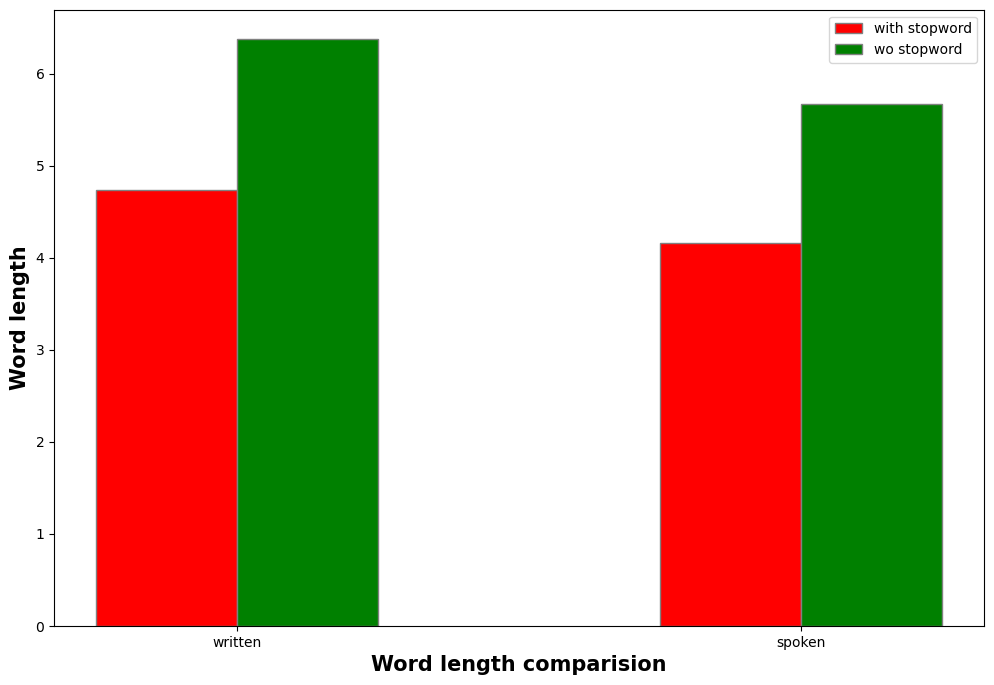

In [ ]:
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))

# set height of bar
w = [word_len_pun,word_len_sp_pun]

wo = [word_len_sw,word_len_sp_sw]

# Set position of bar on X axis
br1 = np.arange(len(written_pun))
br2 = [x + barWidth for x in br1]

# Make the plot
plt.bar(br1, w, color ='r', width = barWidth,
        edgecolor ='grey', label ='with stopword')
plt.bar(br2, wo, color ='g', width = barWidth,
        edgecolor ='grey', label ='wo stopword')

# Adding Xticks
plt.xlabel('Word length comparision', fontweight ='bold', fontsize = 15)
plt.ylabel('Word length', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth/2 for r in range(len(written_pun))],
        ['written', 'spoken'])

plt.legend()
plt.show()

## Discussion

As a reminder, our hypotheses are repeated in (3) and (4) below. The results show that, including stop words, the average sentence length is 17.3 words for written language and 9.8 words for spoken language, resulting in a difference of 7.5 words. The average word length is 4.7 characters for written and 4.1 characters for spoken language, indicating a difference of 0.6 characters.

(3) Hypothesis 1: Spoken language tends to have shorter sentence and word lengths compared to written language.

(4) Hypothesis 2: The variation in sentence and word lengths may decrease once stop words are excluded from the analysis.

Based on these results, we can confirm that our first hypothesis is true.

The average sentence length after the exclusion of stop words is 9.4 words for written language and 4.6 words for spoken language, resulting in a reduced difference of 4.8 words. Regarding word length, the average is 6.4 characters for written language and 5.7 characters for spoken language, indicating a difference of 0.7 characters.

Thus, our second hypothesis is only confirmed for sentence length, where the variation decreases by 4.8 words after the exclusion of stop words. The variation in word length, however, only decreases by 0.1 characters, which is minimal.

The results of the analysis are not surprising for several reasons. First, the inherent nature of spoken versus written language plays a significant role. Spoken language tends to be more informal, spontaneous, and conversational, which naturally leads to shorter sentences and simpler words. In spoken interactions, speakers rely heavily on context, body language, and intonation to convey meaning, reducing the need for detailed or complex language. On the other hand, written language, especially in academic or fictional genres, is more structured and formal, with longer sentences and more complex vocabulary used to convey precise meanings.

Second, the function of stop words in both spoken and written language is primarily grammatical, and they do not carry significant semantic weight. Common stop words like "the," "and," or "is" are frequently used to build grammatical structure but don’t add much to the core meaning of a sentence. When these stop words are removed, what remains are the more meaningful words. In spoken language, where there are more fillers and less formal structure, the removal of stop words has a more pronounced effect on reducing sentence length. This explains why the difference in sentence length decreases more significantly in spoken genres than in written ones once stop words are excluded.

Interestingly, while the sentence length variation decreases substantially after removing stop words, the variation in word length shows only a minimal reduction. The average word length in written language is initially longer than in spoken language, but after stop words are excluded, the difference decreases only slightly, by 0.1 characters. This minimal difference suggests that the core words in both spoken and written language tend to be of similar lengths once the grammatical fillers are removed. This result aligns with the expectations based on Zipf’s Law, which indicates that high-frequency words (many of which are stop words) are typically short, and once removed, the remaining words—those carrying semantic content—are of comparable length in both spoken and written forms.

In summary, the results align with linguistic expectations. Spoken language, with its informal and spontaneous nature, tends to have shorter sentences, while the more structured and elaborate nature of written language leads to longer sentences. The exclusion of stop words narrows this gap, especially for sentences, but the difference in word length remains small, as the key content words are of similar length across both genres.